In [1]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

In [2]:
# dictionary to store 
result = {'without_index': [2.35, 1.71, 1.69,1.6,1.58,1.67,1.6,1.54], 
          'one_index': [2.38,1.86,1.78,1.78,1.71,1.71,1.68,1.65], 
          'two_indexes': [2.37, 1.86, 1.69, 1.66, 1.8, 1.62, 1.62, 1.6]}

In [3]:
#list with background latency values
bg_latency = [0.05178380013, 0.03663873672, 0.047570228, 0.03934764862, 0.0346186161, 0.0537576675, 0.043136835]

In [4]:
# Mean of background latency
mean_latency = np.mean(bg_latency)
mean_latency

0.043836218867142854

In [5]:
# Standard Deviation of background latency
stdev_latency = np.std(bg_latency, ddof=1)
stdev_latency

0.0074492322400459155

In [6]:
# dictionary with background latencies excluded
#result_without_latency =  [(result[i]-mean_latency for i in result]
result_without_latency = {}
throughput_without_latency = {}

#Time without Latency
for key in result:
    result_without_latency[key] = result[key] - mean_latency
    
#Throughput without latency
for key in result_without_latency:
    throughput_without_latency[key] = 10000/result_without_latency[key]

In [7]:
#View times without latency
result_without_latency

{'without_index': array([2.30616378, 1.66616378, 1.64616378, 1.55616378, 1.53616378,
        1.62616378, 1.55616378, 1.49616378]),
 'one_index': array([2.33616378, 1.81616378, 1.73616378, 1.73616378, 1.66616378,
        1.66616378, 1.63616378, 1.60616378]),
 'two_indexes': array([2.32616378, 1.81616378, 1.64616378, 1.61616378, 1.75616378,
        1.57616378, 1.57616378, 1.55616378])}

In [8]:
#View throughput without latency
throughput_without_latency

{'without_index': array([4336.20546893, 6001.81093434, 6074.72969252, 6426.05882571,
        6509.72254575, 6149.44208943, 6426.05882571, 6683.76024477]),
 'one_index': array([4280.52180278, 5506.11134518, 5759.82525881, 5759.82525881,
        6001.81093434, 6001.81093434, 6111.85757521, 6226.01512839]),
 'two_indexes': array([4298.92343828, 5506.11134518, 6074.72969252, 6187.49171138,
        5694.22972244, 6344.5183297 , 6344.5183297 , 6426.05882571])}

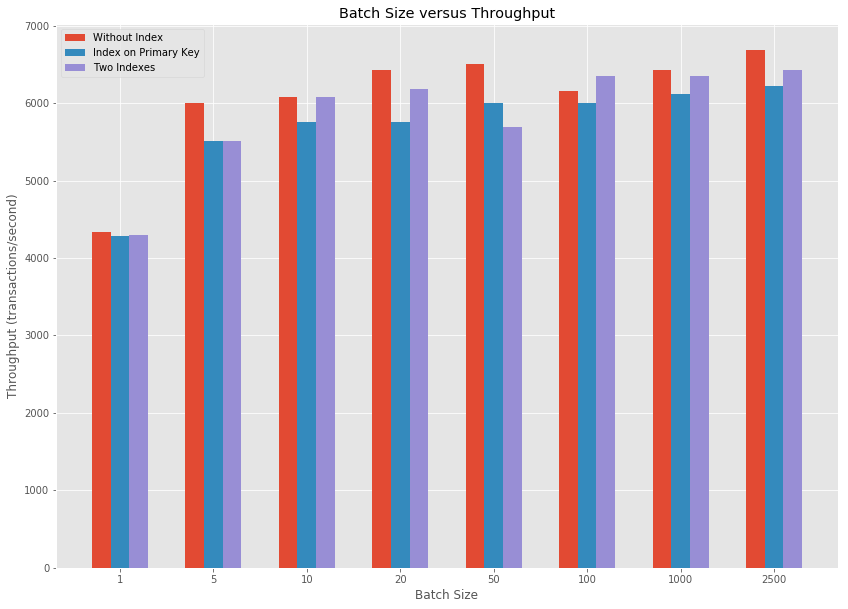

In [9]:
# plot the results
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (14, 10))

index = np.arange(0, 16, 2)                                          # the x locations of the group
width = 0.4

p1 = ax.bar(index, throughput_without_latency['without_index'], width)                   # first set of columns 
p2 = ax.bar(index + width, throughput_without_latency['one_index'], width)               # second set of columns
p3 = ax.bar(index + (2 * width), throughput_without_latency['two_indexes'], width)       # third set of columns

ax.set_title('Batch Size versus Throughput')                         # define the title
ax.set_xticks(index + width)                                         # location of x-ticks
ax.set_xticklabels(('1', '5', '10', '20', '50', '100', '1000', '2500'))

ax.legend((p1[0], p2[0], p3[0]), ('Without Index', 'Index on Primary Key', 'Two Indexes'))
plt.xlabel('Batch Size')                                       
plt.ylabel('Throughput (transactions/second)') 

plt.show()                                                           # sho the plot